In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pairwise_evaluator import Pairwise_evaluator
import sys
sys.path.append("../../")
from src.pairwise_fitter import Pairwise_fitter

In [2]:
def fit_and_eval(fname,nssin, seed=42,nsamples=10_000):
    # fit small system
    mod = Pairwise_fitter(nsamples,"../gen",fname, "../output_small")
    mod.setup(43,input_spaced=True)
    mod.fit("ace","../../ace_utils/ace")
    # evaluate model
    model_j_path = f"../output_small/{fname}/{fname}_sep-output-out.j"
    mod = Pairwise_evaluator(model_j_path,nssin)
    mod.load_ising_paramters()
    mod.calc_partitionf()
    return mod.spin_avgs(),mod.spin_correls()




In [3]:
n = 14
fname = f"{n}spin"

n = 15
fname = "15_erdos"

data_all = np.loadtxt(f"../output_small/{fname}/{fname}_sep-output.p",dtype=np.double)
# data_all = np.loadtxt(f"../output_small/control_data/p7.p",dtype=np.double)

data_si = data_all[:n]
data_sij = data_all[n:]

In [4]:
# model
nruns = 1
si_runs = np.empty((nruns,n))
sij_runs = np.empty((nruns,int(n*(n-1)/2)))
for r in range(nruns):
    model_si, model_sij = fit_and_eval(fname,n,seed=42)
    si_runs[r,:] = model_si
    sij_runs[r,:] = model_sij


System size N: 15
Beff = 10000.000000
('../../ace_utils/ace', '-d', '../output_small/15_erdos', '-i', '15_erdos_sep-output', '-o', '15_erdos_sep-output-out', '-b', '10000', '-ga')
✓ Process done.
('../../ace_utils/ace', '-d', '../output_small/15_erdos', '-i', '15_erdos_sep-output', '-o', '15_erdos_sep-output-out', '-b', '10000', '-ga')
✓ Process done.
(120,)


In [5]:
data_si.shape, data_sij.shape, model_si.shape, model_sij.shape
si_runs

array([[0.48051459, 0.82841021, 0.73602524, 0.35554449, 0.49094345,
        0.67751365, 0.2003761 , 0.48711784, 0.58629397, 0.1951409 ,
        0.5858008 , 0.59309394, 0.58344774, 0.48142937, 0.67576014]])

In [6]:
si_runs[0].shape

(15,)

In [7]:
si_runs.mean(axis=0)

array([0.48051459, 0.82841021, 0.73602524, 0.35554449, 0.49094345,
       0.67751365, 0.2003761 , 0.48711784, 0.58629397, 0.1951409 ,
       0.5858008 , 0.59309394, 0.58344774, 0.48142937, 0.67576014])

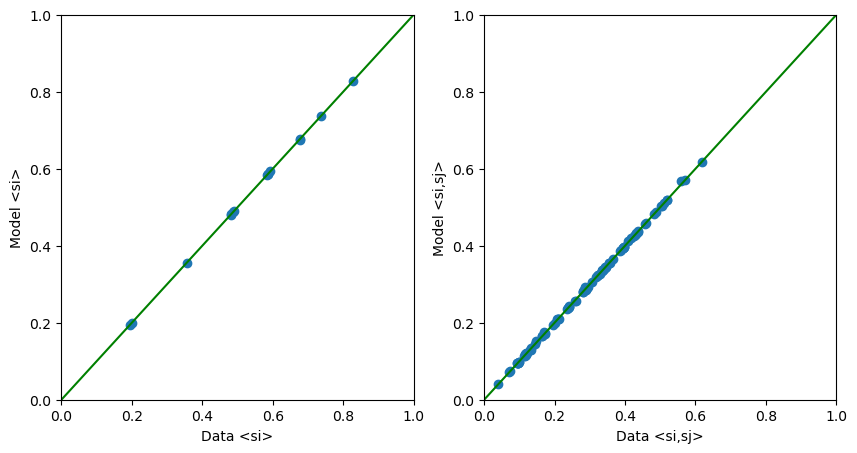

In [10]:


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')

ax = axs[0]

# ax.scatter(data_si, si_runs.mean(axis=0),marker=".")
ax.scatter(data_si, model_si,marker="o")

ax.set_xlabel('Data <si>')
ax.set_ylabel('Model <si>')

ax = axs[1]


ax.scatter(data_sij, sij_runs.mean(axis=0),marker="o")
ax.set_xlabel('Data <si,sj>')
ax.set_ylabel('Model <si,sj>')

for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='green') 



plt.show()
